## Introduction

The world of programming is vast and diverse, with languages coming and going, evolving, and adapting to the changing needs of the industry. One way to gauge the popularity and relevance of programming languages is through the TIOBE Programming Community index, a monthly indicator that provides insights based on a variety of metrics, including search engine queries, courses, and third-party vendors.

In this analysis, we delve into the monthly TIOBE index ratings for the years 2020 to 2023. Our objective is to understand the ebb and flow of programming language popularity, identifying both stalwarts that have stood the test of time and newcomers making a mark in the ecosystem.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

def transform_data_v3(data_path):
    # Read the data
    df = pd.read_csv(data_path, usecols=["Programming Language", "Ratings(%)"])
    
    # Rename the columns for clarity
    df.columns = ["Programming Language", "Rating"]
    
    # Extract the year and month from the filename
    year = int(data_path.split("index_")[1].split(".csv")[0][-4:])
    month_name = data_path.split("index_")[1].split(str(year))[0].rstrip()
    month = datetime.datetime.strptime(month_name, '%B').month
    
    # Convert "Month" and "Year" to a single datetime column
    df["Date"] = datetime.datetime(year, month, 1)
    
    return df


In [74]:
data_dir = os.path.join(os.getcwd(), 'data')

    # Initialize an empty list to store the dataframes
all_dataframes = []

# Iterate over the directories corresponding to the years
year_dirs = ['2020', '2021', '2022', '2023']
for year in year_dirs:
    year_dir_path = os.path.join(data_dir, year)
    for file in os.listdir(year_dir_path):
        if file.endswith(".csv"):
            file_path = os.path.join(year_dir_path, file)
            #df = pd.read_csv(file_path)
            df = transform_data_v3(file_path)
            all_dataframes.append(df)

# Concatenate all the dataframes

combined_df = pd.concat(all_dataframes, ignore_index=True)

In [75]:
df = combined_df.pivot(index="Date", columns="Programming Language", values="Rating")
# Removing outlier for Rust
df.loc[df['Rust'] > 50, 'Rust'] = None
assembly_cols = ['Assembly Langauge', 'Assembly Language', 'Assmebly Language', 'Assmembly Language']
df['Assembly'] = df[assembly_cols].sum(axis=1)
df = df.drop(columns=assembly_cols).reset_index()

df.to_csv('ratings.csv')

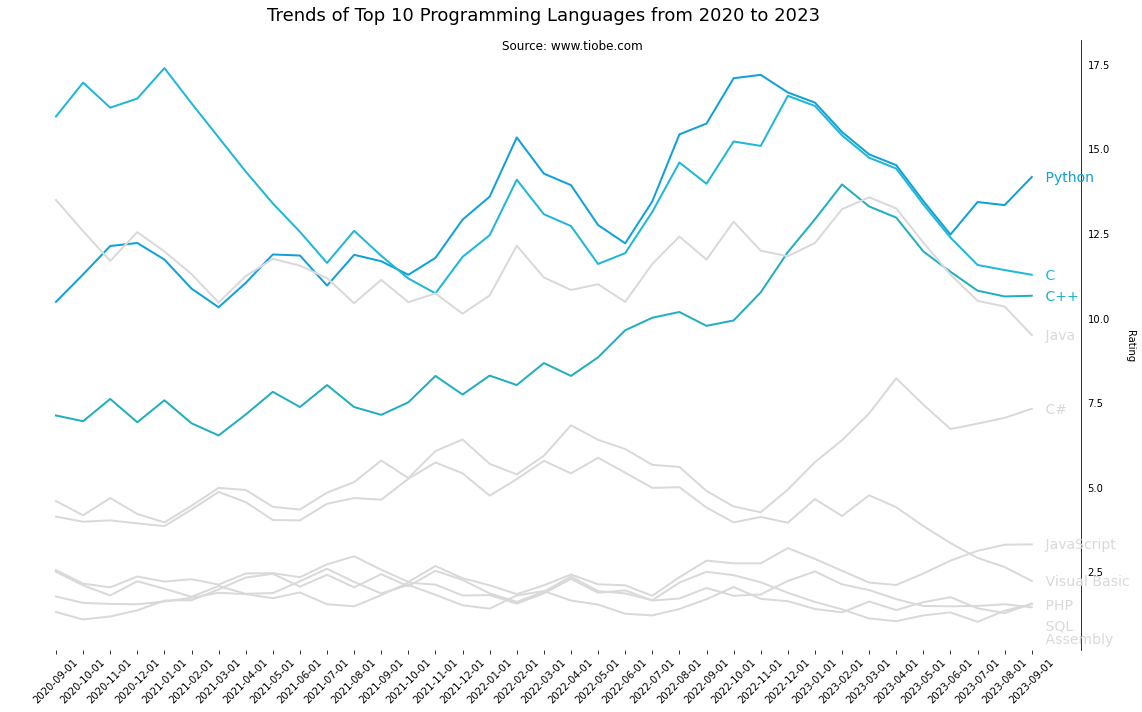

In [76]:
# Convert "Date" column to a string date format (removing the timestamp)
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
final_month_str = df['Date'].max()

# Identify the top 10 languages for the final month
final_month_series = df[df['Date'] == final_month_str].iloc[0, 1:].astype(float)
top_10_languages_final_month = final_month_series.nlargest(10).index.tolist()

# Highlight colors for the top 3 languages in the final month
top_3_languages_final_month = final_month_series.nlargest(3).index.tolist()
highlight_colors = {
    top_3_languages_final_month[0]: "#11A0D9",
    top_3_languages_final_month[1]: "#1EB7D9",
    top_3_languages_final_month[2]: "#21AFBF"
}
default_color = "#D9D9D9"

# Define offsets for the bottom three labels to prevent overlap
label_offsets = {
    "Assembly": -1.25,
    "SQL": -0.75,
    "PHP": -0.25
}

# Plotting the top 10 languages with the adjusted y-label position and orientation
plt.figure(figsize=(16, 10))
for lang in top_10_languages_final_month:
    color = highlight_colors.get(lang, default_color)
    plt.plot(df['Date'], df[lang], color=color, lw=2)
    
    # Label at the end of each line with adjusted positioning
    final_value = df[lang].iloc[-1]
    if lang in label_offsets:
        va = 'bottom'
        offset = label_offsets[lang]
    else:
        va = 'center'
        offset = 0
    
    plt.text(final_month_str, final_value + offset, f'   {lang}', color=color, verticalalignment=va, horizontalalignment='left', fontsize=14)

# Title, y-label, and source adjustments
start_year = pd.to_datetime(df['Date'].min()).year
end_year = pd.to_datetime(df['Date'].max()).year
plt.title(f'Trends of Top 10 Programming Languages from {start_year} to {end_year}', fontsize=18, pad=20)
plt.figtext(0.5, 0.93, "Source: www.tiobe.com", ha="center", fontsize=12, va="center")
plt.ylabel('Rating', rotation=270, va="top", labelpad=25)
plt.gca().yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.gca().yaxis.tick_right()
plt.tight_layout()

# Remove borders (spines) and show the right spine (due to yticks being on the right)
sns.despine(left=True, bottom=True, right=False, top=True)

plt.show()







---

**Insights:**

1. **C's Dominance**: Throughout the observed period, the C programming language has consistently maintained the top position, indicating its enduring relevance and widespread use in the industry.
2. **Java's Decline**: Java, once a dominant language in earlier years, has seen a noticeable decline, particularly in the latter years, showing a shift in preference among developers and organizations.
3. **Python's Rise**: Python has shown a significant upward trajectory, especially in recent years. This can be attributed to its versatility, including its use in web development, data science, artificial intelligence, and more.
4. **New Entrants**: Languages like SQL and PHP, which were not initially among the top contenders, have made their way up the ranks, indicating their growing importance in specific domains.
5. **Consistent Contenders**: Languages like Assembly, though not the most popular, have remained consistent in their rankings, indicating niche yet steady applications.

**Conclusion:**

The landscape of programming languages is ever-evolving, with some languages rising in popularity due to emerging trends, while others maintain their position due to their foundational importance. As technologies advance, developers and organizations must remain adaptable, choosing the right tools for their specific needs. The TIOBE Index provides a valuable snapshot of these trends, helping stakeholders make informed decisions.

---


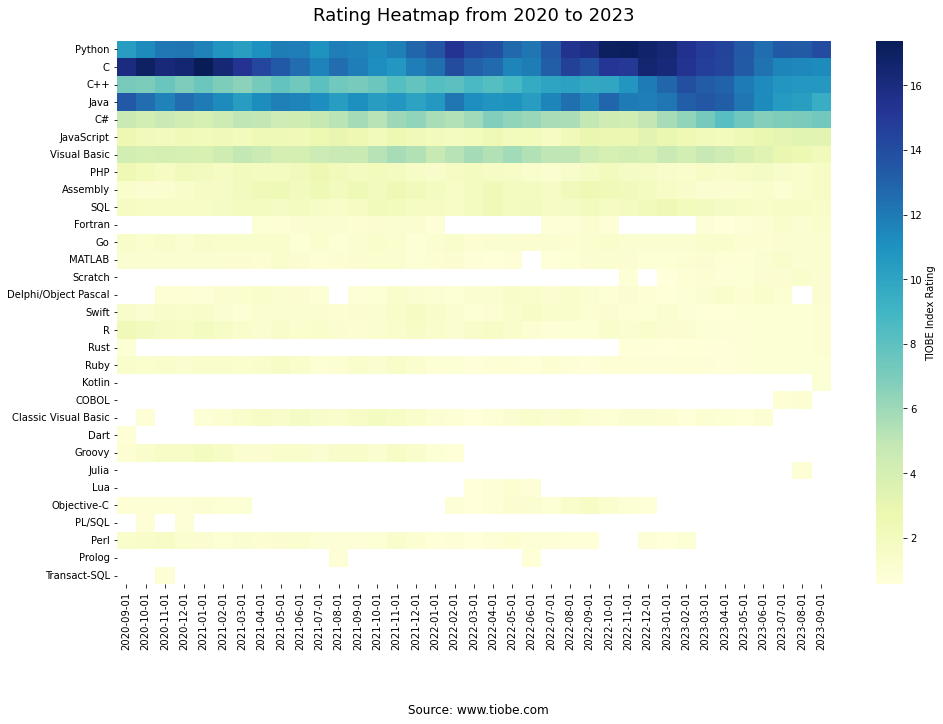

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the dataframe for the heatmap
heatmap_df = df.melt(id_vars='Date', var_name='Language', value_name='Rating')
heatmap_df_pivot = heatmap_df.pivot('Language', 'Date', 'Rating')

# Sorting the dataframe by the final month's ratings
heatmap_df_pivot_sorted = heatmap_df_pivot.sort_values(by=final_month_str, ascending=False)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_df_pivot_sorted, cmap='YlGnBu', cbar_kws={'label': 'TIOBE Index Rating'})
plt.title(f'Rating Heatmap from {start_year} to {end_year}', fontsize=18, pad=20)
plt.ylabel('')
plt.xlabel('')
plt.figtext(0.5, -0.05, "Source: www.tiobe.com", ha="right", fontsize=12, va="center")
plt.show()


---

### Insights

**Consistent Leaders:** Languages like `Python`, `Java`, and `C` have consistently maintained top positions in the TIOBE Index over the observed period. Their darker rows throughout the heatmap suggest their long-standing popularity.
  
**Rising Stars:** Some languages, such as `Rust`, have shown a noticeable increase in popularity over time. This is evident from the gradual color transition from lighter to darker shades, indicating improved ratings.
  
**Declining Popularity:** Certain languages, like `Visual Basic .NET`, appear to have lost ground, as suggested by their transition from darker shades to lighter ones over the years.
  
**Stalwarts:** Languages such as `PHP` and `SQL` have remained relatively stable, neither witnessing a dramatic rise nor a significant fall in their ratings.
  
**Lesser-Known Contenders:** While top languages dominate discussions, several languages occupy the mid-tier positions consistently, indicating their niche but persistent relevance in the software industry.

### Conclusion:

The TIOBE Index heatmap provides a rich visual representation of the dynamic landscape of programming languages. While certain languages have steadfastly held their ground, others have witnessed shifts in popularity. This evolution underscores the ever-changing nature of technology and the importance of adaptability in the software development realm. It's crucial for professionals and enthusiasts alike to keep an eye on these trends, ensuring they stay updated with the skills most relevant to the industry.

---

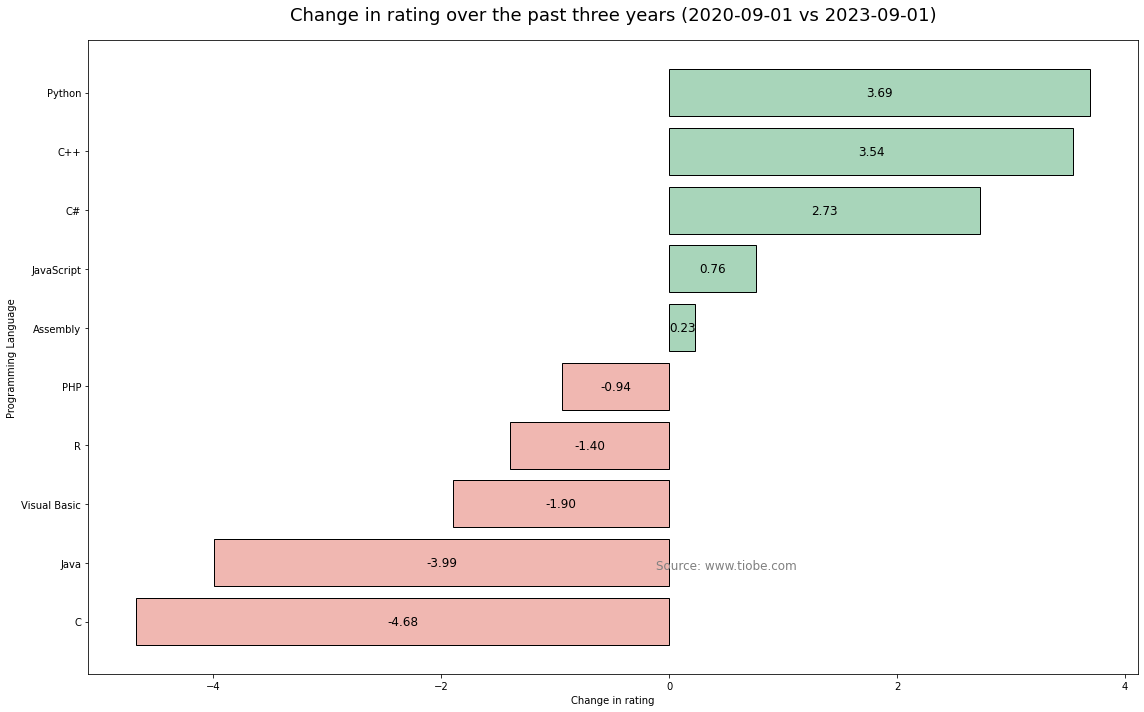

In [78]:
import matplotlib.pyplot as plt

# Extract the start and end months from the dataset
start_month_str = df['Date'].min()
final_month_str = df['Date'].max()

# Calculate the change in ratings over the observed period based on the actual ratings
df_changes = df.set_index('Date').transpose()
df_changes['Rating Change'] = df_changes[final_month_str] - df_changes[start_month_str]

# Filtering for top 5 positive and top 5 negative changes
top_positive_changes = df_changes['Rating Change'].nlargest(5)
top_negative_changes = df_changes['Rating Change'].nsmallest(5)

# Combining the changes
combined_changes = pd.concat([top_positive_changes, top_negative_changes])

# Eye-friendly colors
positive_color = "#a8d5ba"  # Muted green
negative_color = "#f0b7b1"  # Muted red

# Visualization
plt.figure(figsize=(16, 10))
bars = plt.barh(combined_changes.sort_values().index, combined_changes.sort_values(), 
                color=[positive_color if x < 0 else negative_color for x in combined_changes], 
                edgecolor='black')

# Adding data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width/2, 
             bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', 
             ha='center', 
             va='center', 
             color='black',
             fontsize=12)

# Main title with date range
plt.title(f'Change in rating over the past three years ({start_month_str} vs {final_month_str})', fontsize=18, pad=20)

# Subtitle for source
plt.text(0.5, 0.95, "Source: www.tiobe.com", ha="center", fontsize=12, va="center", color='grey')

plt.xlabel('Change in rating')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()




### Insights:

**Python Leads Positive Change:** Python demonstrated the most substantial positive change in its TIOBE Index rating among the languages visualized. With an increase of approximately +4.68, Python solidified its position as a dominant and continuously growing programming language.

**C Loses Ground:** Among the languages shown, C experienced the most significant decline in its TIOBE Index rating. While still a widely used language, this decline may indicate evolving preferences in the developer landscape.
